In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [23]:
df=pd.read_csv('GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


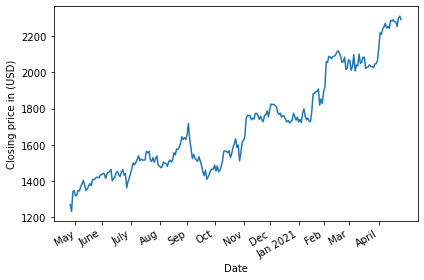

In [24]:
fig, ax=plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price in (USD)')
plt.xticks([4,24,46,68,89,110,132,152,174,193,212,235],
          ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

In [25]:
GOOGL_ADF_result = adfuller(df['Close'])
print(f'ADF Statistic:{GOOGL_ADF_result[0]}')
print(f'p-value:{GOOGL_ADF_result[1]}')

ADF Statistic:0.16025048664771524
p-value:0.9699419435913058


In [26]:
diff_close=np.diff(df['Close'], n=1)

In [27]:
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk=np.cumsum(steps)

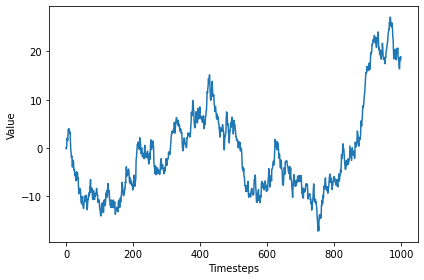

In [28]:
fig, ax=plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [29]:
def simulate_process(is_stationary:bool)->np.array:
    np.random.seed(42)
    process=np.empty(400)
   
    if is_stationary:
        alpha=0.5
        process[0]=0
    else:
        alpha=1
        process[0]=10
       
    for i in range(400):
        if i+1<400:
            process[i+1]=alpha*process[i]+np.random.standard_normal()
        else:
            break
    return process

In [30]:
stationary=simulate_process(True)
non_stationary=simulate_process(False)

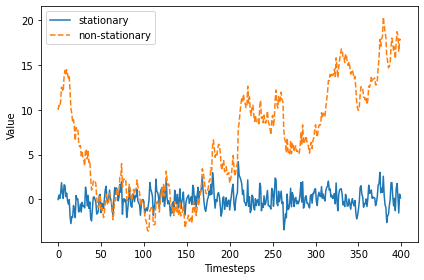

In [31]:
fig, ax=plt.subplots()
ax.plot(stationary,linestyle='-',label='stationary')
ax.plot(non_stationary,linestyle='--',label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)
plt.tight_layout()

In [32]:
def mean_over_time(process:np.array)->np.array:
    mean_func=[]
    
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
        
    return mean_func

In [33]:
stationary_mean=mean_over_time(stationary)
non_stationary_mean=mean_over_time(non_stationary)

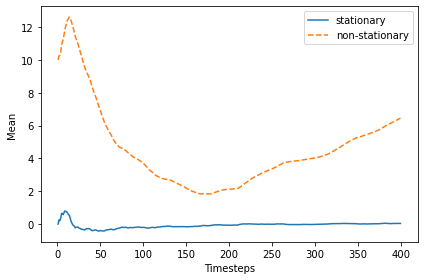

In [34]:
fig, ax=plt.subplots()
ax.plot(stationary_mean,label='stationary')
ax.plot(non_stationary_mean,linestyle='--',label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)
plt.tight_layout()

In [35]:
ADF_result=adfuller(random_walk)
print(f'ADF Statistic:{ADF_result[0]}')
print(f'p-value:{ADF_result[1]}')

ADF Statistic:-0.9659524876918759
p-value:0.7654789696692579


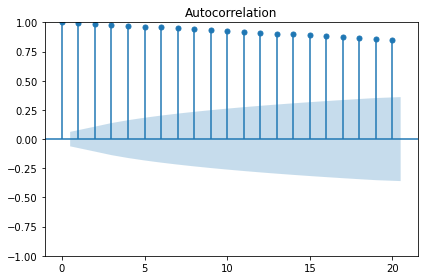

In [36]:
plot_acf(random_walk,lags=20);
plt.tight_layout()

In [37]:
diff_random_walk=np.diff(random_walk, n=1)

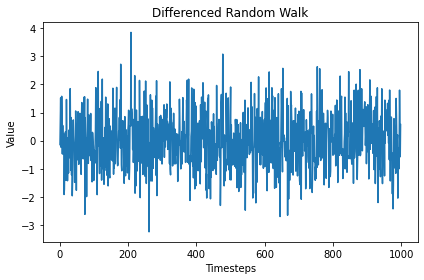

In [38]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

In [39]:
ADF_result=adfuller(diff_random_walk)
print(f'ADF Statistic:{ADF_result[0]}')
print(f'p-value:{ADF_result[1]}')

ADF Statistic:-31.7893108575606
p-value:0.0


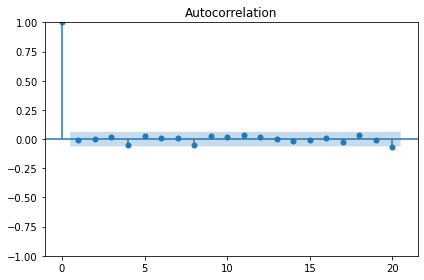

In [40]:
plot_acf(diff_random_walk,lags=20);
plt.tight_layout()

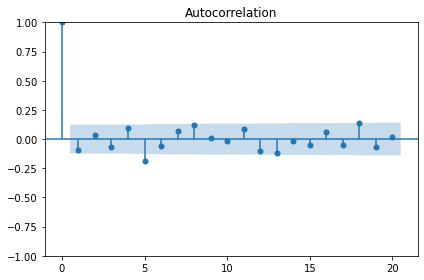

In [41]:
plot_acf(diff_close, lags=20);
plt.tight_layout()

In [42]:
np.random.seed(42)
steps=np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [43]:
#Testing and training the data set:

In [44]:
df=pd.DataFrame({'value':random_walk})
train=df[:800]
test=df[800:]

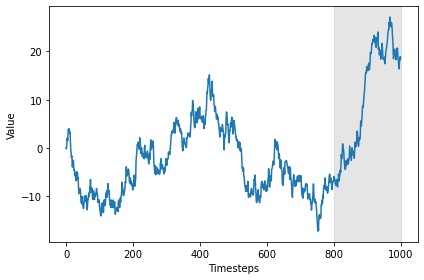

In [45]:
fig, ax=plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800,1000,color='#808080', alpha=0.2)
plt.tight_layout()

In [46]:
mean = np.mean(train.value)
test.loc[:, 'pred_mean']=mean
test.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [47]:
last_value=train.iloc[-1].value
test.loc[:,'pred_last']=last_value
test.head()

,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [48]:
deltaX=800-1
deltaY=last_value-0
drift=deltaY/deltaX
print(drift)

-0.008529346056640632


In [49]:
x_vals=np.arange(801,1001,1)
pred_drift=drift*x_vals
test.loc[:,'pred_drift']=pred_drift
test.head()

,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


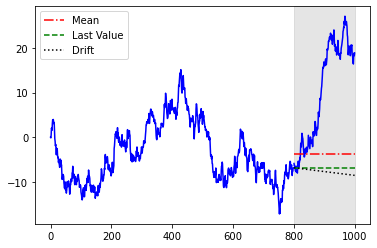

In [50]:
fig, ax=plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label= 'Last Value')
ax.plot(test['pred_drift'], 'k:', label= 'Drift')

ax.axvspan(800,1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.legend(loc=2)

In [51]:
df_shift=df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


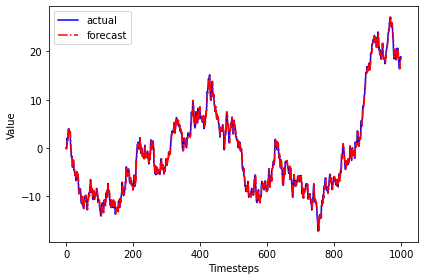

In [52]:
fig, ax=plt.subplots()
ax.plot(df, 'b', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [53]:
from sklearn.metrics import mean_squared_error
mse_one_step=mean_squared_error(test['value'], df_shift[800:])
mse_one_step

0.9256876651440581

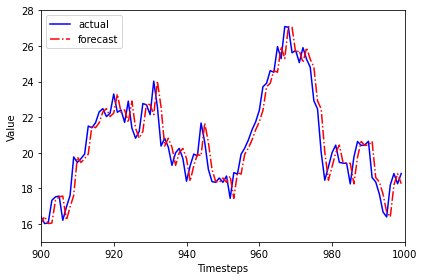

In [54]:
fig, ax=plt.subplots()
ax.plot(df, 'b', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')
ax.legend(loc=2)


ax.set_xlim(900,1000)
ax.set_ylim(15,28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()